<a href="https://colab.research.google.com/github/T-art-coder/LearningNotebooksR/blob/main/Handlings_strings_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
library(tidyverse)
library(stringr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Summary of useful functions:
## 1. Introduction
1. **abbreviate(x, minlength = 5)**

2. **the longest name**

```
 size (in characters) of each name
state_chars = nchar(states)
state_chars
#>  [1]  7  6  7  8 10  8 11  8  7  7  6  5  8  7  4  6  8  9  5  8 13  8  9 11  8
#> [26]  7  8  6 13 10 10  8 14 12  4  8  6 12 12 14 12  9  5  4  7  8 10 13  9  7

# longest name
states[which(state_chars == max(state_chars))]
```

3. Count appereance of a pattern - str_count



```
str_count(states, "a")
```



Использование tolower в функции, переводящей градусы в разные шкалы

```
temp_convert <- function(deg = 1, to = "celsius") {
  switch(tolower(to),
         "celsius" = (deg - 32) * (5/9),
         "kelvin" = (deg + 459.67) * (5/9),
         "reaumur" = (deg - 32) * (4/9),
         "rankine" = deg + 459.67)
}
```



```
# remove whitespaces on both sides
str_trim(bad_text, side = "both")
```





## 1. Introduction

### 1.1.1 Abbreviating strings

In [ ]:
states <- rownames(USArrests)

head(states)

[1] "Alabama"    "Alaska"     "Arizona"    "Arkansas"   "California"
[6] "Colorado"

In [ ]:
# Make abbreviation

substr(x = states, start = 1, stop = 4)

# Disadvantage of this approach - we can have identical substring for different strin (New York, New Hampshir)

[1] "Alab" "Alas" "Ariz" "Arka" "Cali" "Colo" "Conn" "Dela" "Flor" "Geor"
[11] "Hawa" "Idah" "Illi" "Indi" "Iowa" "Kans" "Kent" "Loui" "Main" "Mary"
[21] "Mass" "Mich" "Minn" "Miss" "Miss" "Mont" "Nebr" "Neva" "New " "New "
[31] "New " "New " "Nort" "Nort" "Ohio" "Okla" "Oreg" "Penn" "Rhod" "Sout"
[41] "Sout" "Tenn" "Texa" "Utah" "Verm" "Virg" "Wash" "West" "Wisc" "Wyom"

In [ ]:
# let's use abbreviate

states2 <- abbreviate(states)
names(states2) <- NULL

states2

[1] "Albm" "Alsk" "Arzn" "Arkn" "Clfr" "Clrd" "Cnnc" "Dlwr" "Flrd" "Gerg"
[11] "Hawa" "Idah" "Illn" "Indn" "Iowa" "Knss" "Kntc" "Losn" "Main" "Mryl"
[21] "Mssc" "Mchg" "Mnns" "Msss" "Mssr" "Mntn" "Nbrs" "Nevd" "NwHm" "NwJr"
[31] "NwMx" "NwYr" "NrtC" "NrtD" "Ohio" "Oklh" "Orgn" "Pnns" "RhdI" "SthC"
[41] "SthD" "Tnns" "Texs" "Utah" "Vrmn" "Vrgn" "Wshn" "WstV" "Wscn" "Wymn"

In [ ]:
# abbreviate state names with 5 letters
abbreviate(states, minlength = 5)

Alabama         Alaska        Arizona       Arkansas     California 
       "Alabm"        "Alask"        "Arizn"        "Arkns"        "Clfrn" 
      Colorado    Connecticut       Delaware        Florida        Georgia 
       "Colrd"        "Cnnct"        "Delwr"        "Flord"        "Georg" 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
       "Hawai"        "Idaho"        "Illns"        "Indin"         "Iowa" 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
       "Kanss"        "Kntck"        "Lousn"        "Maine"        "Mryln" 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
       "Mssch"        "Mchgn"        "Mnnst"        "Mssss"        "Missr" 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
       "Montn"        "Nbrsk"        "Nevad"        "NwHmp"        "NwJrs" 
    New Mexico       New York North Carolina   North Dakota           Ohio 
       "NwMxc"        "NwYrk"        "NrthC"        "NrthD"         "Ohio" 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
       "Oklhm"        "Oregn"        "Pnnsy"        "RhdIs"        "SthCr" 
  South Dakota      Tennessee          Texas           Utah        Vermont 
       "SthDk"        "Tnnss"        "Texas"         "Utah"        "Vrmnt" 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
       "Virgn"        "Wshng"        "WstVr"        "Wscns"        "Wymng"

### 1.1.3 Selecting States - Choose by a pattern

In [ ]:
# get states names with 'F'

grep(pattern = "w", x = states, value = TRUE)

[1] "Delaware"      "Hawaii"        "Iowa"          "New Hampshire"
[5] "New Jersey"    "New Mexico"    "New York"

In [ ]:
# get states names with 'w' or 'W'
grep(pattern = "[wW]", x = states, value = TRUE)

[1] "Delaware"      "Hawaii"        "Iowa"          "New Hampshire"
 [5] "New Jersey"    "New Mexico"    "New York"      "Washington"   
 [9] "West Virginia" "Wisconsin"     "Wyoming"

In [ ]:
# get states names with 'w'
grep(pattern = "w", x = tolower(states), value = TRUE)

[1] "delaware"      "hawaii"        "iowa"          "new hampshire"
 [5] "new jersey"    "new mexico"    "new york"      "washington"   
 [9] "west virginia" "wisconsin"     "wyoming"

A third solution involves specifying the argument ignore.case=TRUE inside grep():

### 1.1.4 Some computations

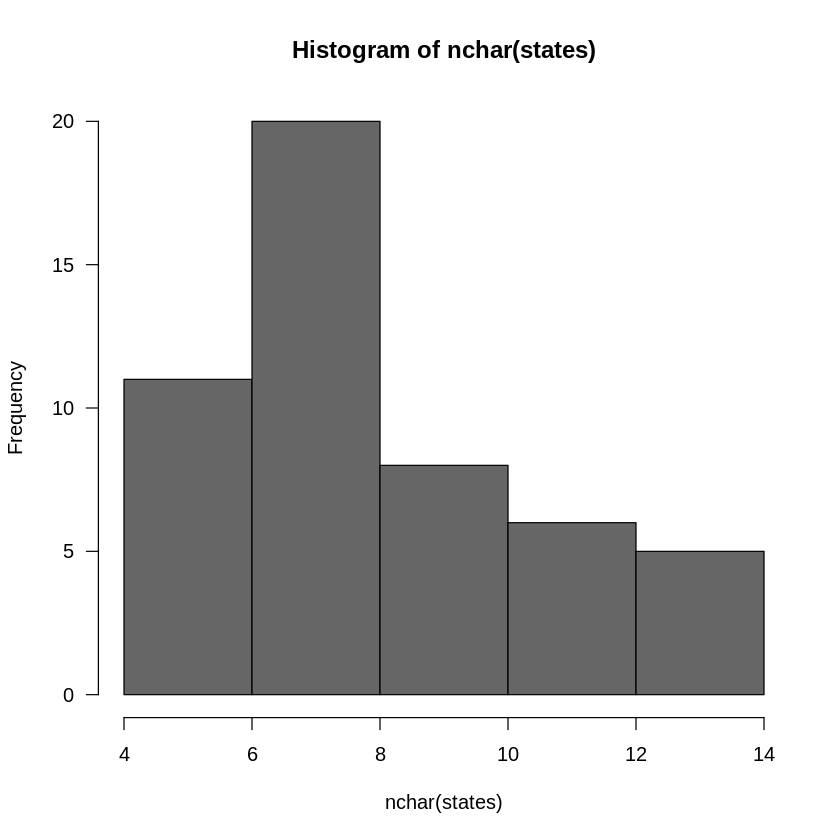

In [ ]:
## Get distribution of names by length

hist(nchar(states), las = 1, col = "gray40")

In [ ]:
# distribution of the "a" vowel?
# gregexpr - We can use regexpr() to get the number of times that a searched pattern is found in a character vector. 

positions_a <- gregexpr(pattern = "a", text = states, ignore.case = TRUE)
#positions_a

num_a <- sapply(positions_a, function(x) ifelse(x[1]>0, length(x), 0))

num_a

[1] 4 3 2 3 2 1 0 2 1 1 2 1 0 2 1 2 0 2 1 2 2 1 1 0 0 2 2 2 1 0 0 0 2 2 0 2 0 2
[39] 1 2 2 0 1 1 0 1 1 1 0 0

The same operation can be performed by using the function str_count() from the package "stringr".



In [ ]:
str_count(states, "a")

# str_count() does not contain the argument ignore.case



[1] 3 2 1 2 2 1 0 2 1 1 2 1 0 2 1 2 0 2 1 2 2 1 1 0 0 2 2 2 1 0 0 0 2 2 0 2 0 2
[39] 1 2 2 0 1 1 0 1 1 1 0 0

In [ ]:
# total number of a's
str_count(tolower(states), "a")

[1] 4 3 2 3 2 1 0 2 1 1 2 1 0 2 1 2 0 2 1 2 2 1 1 0 0 2 2 2 1 0 0 0 2 2 0 2 0 2
[39] 1 2 2 0 1 1 0 1 1 1 0 0

Check a number of patterns

In [ ]:
vowels <- c("a", "e", "i", "o", "u")

# vector for counting
num_vowels <- vector(mode = "integer", length = 5)

for (j in seq_along(vowels)) {
  num_aux <- str_count(tolower(states), vowels[j])
  num_vowels[j] <- sum(num_aux)
}

In [ ]:
# sort them in decreasing order
names(num_vowels) <- vowels
sort(num_vowels, decreasing = TRUE)

a  i  o  e  u 
61 44 36 28  8

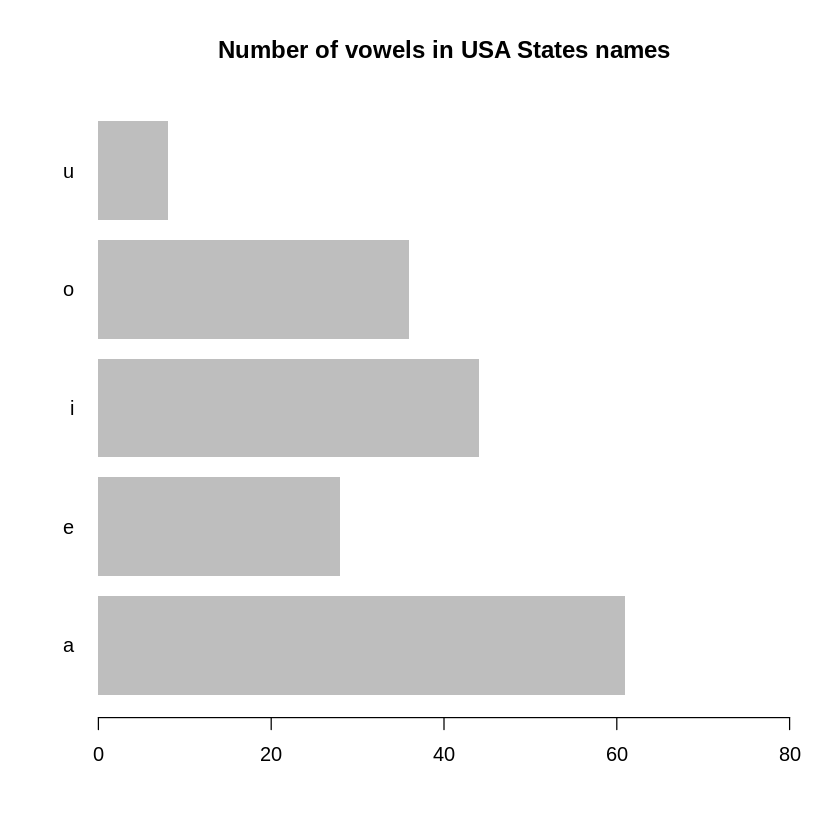

In [ ]:
# barplot
barplot(num_vowels, main = "Number of vowels in USA States names", 
        border = NA, xlim = c(0, 80), las = 1, horiz = TRUE)

## 2. Character Strings in R

In [2]:
"The \"R\" project for statistical computing"

[1] "The \"R\" project for statistical computing"

**It is important not to confuse the empty character vector character(0) with the empty string ""; one of the main differences between them is that they have different lengths:**

In [3]:
empty_str <- ""

empty_chr <- character(0)

In [4]:
# length of empty string
length(empty_str)
#> [1] 1

# length of empty character vector
length(empty_chr)
#> [1] 0

[1] 1

[1] 0

Basically empty string has an empty input "" (so length = 1)


R: data types: vector, factor, matrix (and array), data.frame, and list.

1.  R has six types of **vectors**, technically referred to as atomic types or atomic vectors: **logical, integer, double, character, complex, and raw**.

2. Data frames. With data frames, things are a bit different. By default, character strings inside a data frame will be converted to factors:
3. To turn-off the data.frame()’s default behavior of converting strings into factors, use the argument stringsAsFactors = FALSE:

When you combine different data types in a vector, strings will dominate

In [5]:
paste("X", 1:5, sep = ".")

[1] "X.1" "X.2" "X.3" "X.4" "X.5"

In [6]:
# paste with collapsing
paste(1:3, c("!","?","+"), sep = '', collapse = "")
#> [1] "1!2?3+"

# paste without collapsing
paste(1:3, c("!","?","+"), sep = '')
#> [1] "1!" "2?" "3+"

[1] "1!2?3+"

[1] "1!" "2?" "3+"

In [ ]:
# read 'ktop100.txt' file
top105 <- readLines("http://www.textfiles.com/music/ktop100.txt")

###

In [8]:
# replace 'a' by 'A'
chartr("a", "A", "This is a boring string")
#> [1] "This is A boring string"

[1] "This is A boring string"

In [9]:
# multiple replacements
crazy <- c("Here's to the crazy ones", "The misfits", "The rebels")
chartr("aei", "#!?", crazy)

[1] "H!r!'s to th! cr#zy on!s" "Th! m?sf?ts"             
[3] "Th! r!b!ls"

## 3.3 Set operations

In [16]:

set5 <- c("some", "random", "few", "words")
set6 <- c("some", "many", "none", "few")

# difference between set5 and set6
setdiff(set5, set6)

[1] "random" "words"

In [12]:
# set7 == set8?
setequal(set5, set6)

[1] FALSE

In [13]:
identical(set5, set6)

[1] FALSE

In [14]:
# three vectors
set10 <- c("some", "stuff", "to", "play", "with")
elem1 <- "play"
elem2 <- "crazy"

# elem1 in set10?
is.element(elem1, set10)

[1] TRUE

In [15]:
paste(rep("x", 4), collapse = " ")

[1] "x x x x"

## StringR

In [17]:
# default usage
str_c("May", "The", "Force", "Be", "With", "You")

# zero length arguments like NULL and character(0) are silently removed by str_c().

[1] "MayTheForceBeWithYou"

In [18]:
# synonym function 'str_glue'
str_glue("May", "The", "Force", "Be", "With", "You", .sep = "_")

May_The_Force_Be_With_You

In [19]:
# some text (NA included)
some_text <- c("one", "two", "three", NA, "five")

# compare 'str_length' with 'nchar'
nchar(some_text)
#> [1]  3  3  5 NA  4
str_length(some_text)
#> [1]  3  3  5 NA  4

[1]  3  3  5 NA  4

[1]  3  3  5 NA  4

n addition, str_length() has the nice feature that it converts factors to characters, something that nchar() is not able to handle:



```
str_sub(string, start = 1L, end = -1L)
```



In [20]:
lorem <- "Lorem Ipsum"

# apply 'str_sub'
str_sub(lorem, start = 1, end = 3)


[1] "Lor"

In [21]:
# extracting sequentially
str_sub(lorem, seq_len(nchar(lorem)))

[1] "Lorem Ipsum" "orem Ipsum"  "rem Ipsum"   "em Ipsum"    "m Ipsum"    
 [6] " Ipsum"      "Ipsum"       "psum"        "sum"         "um"         
[11] "m"

In [22]:
# reverse substrings with negative positions
str_sub(lorem, -seq_len(nchar(lorem)))

[1] "m"           "um"          "sum"         "psum"        "Ipsum"      
 [6] " Ipsum"      "m Ipsum"     "em Ipsum"    "rem Ipsum"   "orem Ipsum" 
[11] "Lorem Ipsum"

### 4.3.6 - str_pad() add symbols from the left and right

In [23]:
str_pad("hola", width = 8)

[1] "    hola"

In [26]:
# display paragraph with following lines indentation of 3
some_quote <- c(
  "I may not have gone",
  "where I intended to go,", 
  "but I think I have ended up",
  "where I needed to be")

cat(str_wrap(some_quote, width = 30, exdent = 3), "\n")

I may not have gone where I intended to go, but I think I have ended up where I needed to be 


### Trim whitespaces with str_trim(string, side = "both)

In [27]:
# text with whitespaces
bad_text <- c("This", " example ", "has several   ", "   whitespaces ")

# remove whitespaces on the left side
str_trim(bad_text, side = "left")
#> [1] "This"           "example "       "has several   " "whitespaces "

[1] "This"           "example "       "has several   " "whitespaces "

In [28]:
# remove whitespaces on both sides
str_trim(bad_text, side = "both")
#> [1] "This"        "example"     "has several" "whitespaces"

[1] "This"        "example"     "has several" "whitespaces"

## Basis Manipulation Examples
https://www.gastonsanchez.com/r4strings/basic-manipulation-examples.html


### 8.1.1 Example: Names of files
Imagine that you need to generate the names of 10 data .csv files. All the files have the same prefix name but each of them has a different number: file1.csv, file2.csv, … , file10.csv.

In [29]:
paste("file", 1:10, ".csv", sep = "")

[1] "file1.csv"  "file2.csv"  "file3.csv"  "file4.csv"  "file5.csv" 
 [6] "file6.csv"  "file7.csv"  "file8.csv"  "file9.csv"  "file10.csv"

In [30]:
paste0("file", 1:10, ".csv")

[1] "file1.csv"  "file2.csv"  "file3.csv"  "file4.csv"  "file5.csv" 
 [6] "file6.csv"  "file7.csv"  "file8.csv"  "file9.csv"  "file10.csv"

In [ ]:
colors()

In [33]:
is_color <- function(x) {
  x %in% colors()
}

is_color2 <- function(x) {
  any(colors() == x)
}

In [34]:
is_color('yellow')

[1] TRUE

In [35]:
is_color2 <- function(x) {
  any(colors() == x)
}

### 8.1.3 Example: Me and You plot

In [36]:
set.seed(333)

n <- 1000

x <- rnorm(n)

y <- rnorm(n, 1, 2)

In [ ]:
# graphical parameters
op <- par(bg = "gray10")
# plot text
plot(x, y, type = "n")
text(x, y, 
     labels = "me & you",
     col = "white")
# reset default parameters
par(op)

In [ ]:
# text size
sizes <- runif(n, 0.5, 3)

# text color
hues <- runif(n, 0.85, 0.95)
alphas <- runif(n, 0.1, 1)


op <- par(bg = "gray10", mar = rep(0, 4))
plot(x, y, type = "n", axes = FALSE, 
     xlab = '', ylab = '')
text(x, y, 
     labels = "me & you", 
     font = 3, 
     col = hsv(hues, 1, 1, alphas),
     cex = sizes)
par(op)